# Employee Productivity and Satisfaction HR Data

## About Dataset

This dataset was created to explore the diverse factors impacting employee performance and satisfaction in a typical organization. It spans a variety of fields from personal demographics to performance metrics and job details, offering a comprehensive view into the dynamics of the workplace.

The inspiration behind the creation of this dataset is to provide an accessible resource for those interested in the field of HR analytics. It can be used to derive insights into employee performance, satisfaction, and overall engagement at work. This dataset is particularly useful for tasks such as predicting employee turnover, analyzing employee performance, and understanding the factors that influence job satisfaction.

## Imports 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
plt.style.use('ggplot')

In [28]:
hr_df = pd.read_csv("hr_dashboard_data.csv")
hr_df.head(15)

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
5,Jonathan King,24,Male,5,63,33,4.2,Sales,Junior Developer,Jan-21,48740
6,Kyle Figueroa,33,Female,13,41,39,2.3,Sales,Analyst,Jan-18,73502
7,Shannon Allen,23,Female,4,92,68,2.8,HR,Intern,Jan-21,39670
8,Daryl Noble,30,Female,7,32,43,2.3,Marketing,Junior Developer,Jan-19,49323
9,Tracy Figueroa,39,Female,17,10,15,1.1,HR,Team Lead,Jan-04,92915


## Data Understanding 

In the given data, Gather informations that would make some use.

In [29]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [30]:
hr_df.columns

Index(['Name', 'Age', 'Gender', 'Projects Completed', 'Productivity (%)',
       'Satisfaction Rate (%)', 'Feedback Score', 'Department', 'Position',
       'Joining Date', 'Salary'],
      dtype='object')

In [31]:
hr_df.shape

(200, 11)

In [32]:
#check for possible nan values
hr_df.isna().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

Seems like the data given is clean and has no nan values.

In [33]:
hr_df.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,76619.245000
std,9.797318,6.408849,28.530068,28.934353,1.123263,27082.299202
min,22.000000,0.000000,0.000000,0.000000,1.000000,30231.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,53080.500000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,80540.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,101108.250000
max,60.000000,25.000000,98.000000,100.000000,4.900000,119895.000000


# Data Preparation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation 

In [34]:
hr_df.drop(["Name"], axis = 1, inplace = True)

In this EDA we are not using names of people in the dataset so might as well drop it.

In [36]:
#Rename some columns
hr_df = hr_df.rename(columns = {"Projects Completed" : "Projects_Completed", "Productivity (%)" : "Productivity(%)",
                                "Satisfaction Rate (%)" : "Satisfaction_Rate(%)", "Feedback Score" : "Feedback_Score",
                               "Joining Date" : "Joining_Date"})
hr_df

,Age,Gender,Projects_Completed,Productivity(%),Satisfaction_Rate(%),Feedback_Score,Department,Position,Joining_Date,Salary
0,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...
195,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


### Check for duplicated data 

In [40]:
hr_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [39]:
hr_df.loc[hr_df.duplicated()]

,Age,Gender,Projects_Completed,Productivity(%),Satisfaction_Rate(%),Feedback_Score,Department,Position,Joining_Date,Salary


In [42]:
hr_df.loc[hr_df.duplicated(subset = ["Joining_Date"])]

,Age,Gender,Projects_Completed,Productivity(%),Satisfaction_Rate(%),Feedback_Score,Department,Position,Joining_Date,Salary
7,23,Female,4,92,68,2.8,HR,Intern,Jan-21,39670
12,25,Female,2,15,97,1.8,HR,Intern,Jan-21,35169
13,32,Female,14,45,20,3.1,Marketing,Analyst,Jan-18,70271
14,29,Male,18,88,8,1.8,Sales,Senior Developer,Jan-18,89571
15,40,Male,17,3,53,1.8,Sales,Manager,Jan-13,118466
...,...,...,...,...,...,...,...,...,...,...
195,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


Results given shows that the data is clean and there is no presence of duplicated values.

# Feature Understanding
### (Univariate analysis)
* Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

Text(0, 0.5, 'Feedback Score')

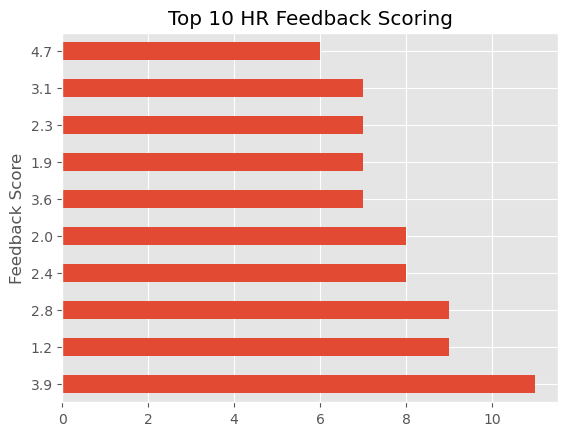

In [66]:
ax = hr_df["Feedback_Score"].value_counts().head(10).plot(kind = "barh", title ="Top 10 HR Feedback Scoring")
ax.set_ylabel('Feedback Score')

Text(0.5, 0, 'Project Counts')

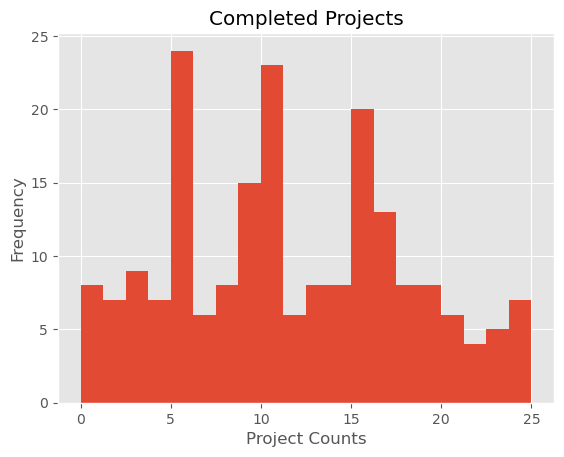

In [67]:
ax = hr_df["Projects_Completed"].plot(kind = "hist", bins = 20, title = "Completed Projects")
ax.set_xlabel("Project Counts")

Text(0.5, 0, 'Project Counts')

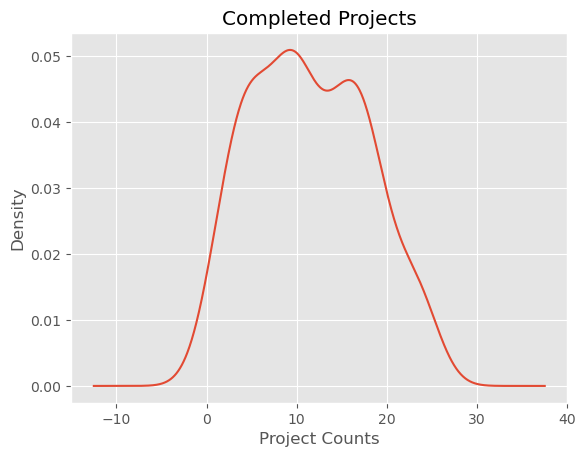

In [68]:
ax = hr_df["Projects_Completed"].plot(kind = "kde", title = "Completed Projects")
ax.set_xlabel("Project Counts")

In [69]:
hr_df["Gender"].value_counts()

Male      100
Female    100
Name: Gender, dtype: int64

# Relationship Features

* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

In [70]:
hr_df.head()

,Age,Gender,Projects_Completed,Productivity(%),Satisfaction_Rate(%),Feedback_Score,Department,Position,Joining_Date,Salary
0,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


<Axes: title={'center': 'Age vs Projects Completed'}, xlabel='Age', ylabel='Projects_Completed'>

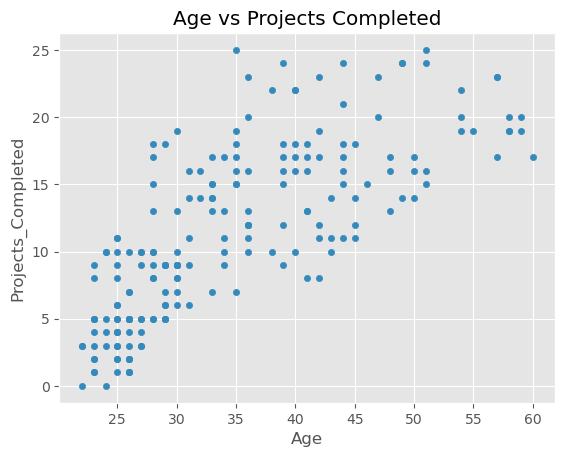

In [75]:
hr_df.plot(kind = "scatter", x = "Age", y = "Projects_Completed", title = 'Age vs Projects Completed')


Text(0.5, 1.0, 'Age vs Projects Completed')

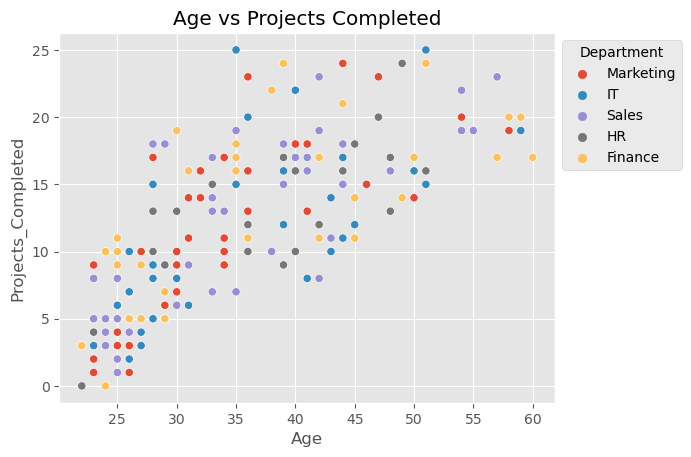

In [77]:
ax = sns.scatterplot(x = "Age", y = "Projects_Completed", hue = "Department", data = hr_df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Age vs Projects Completed')

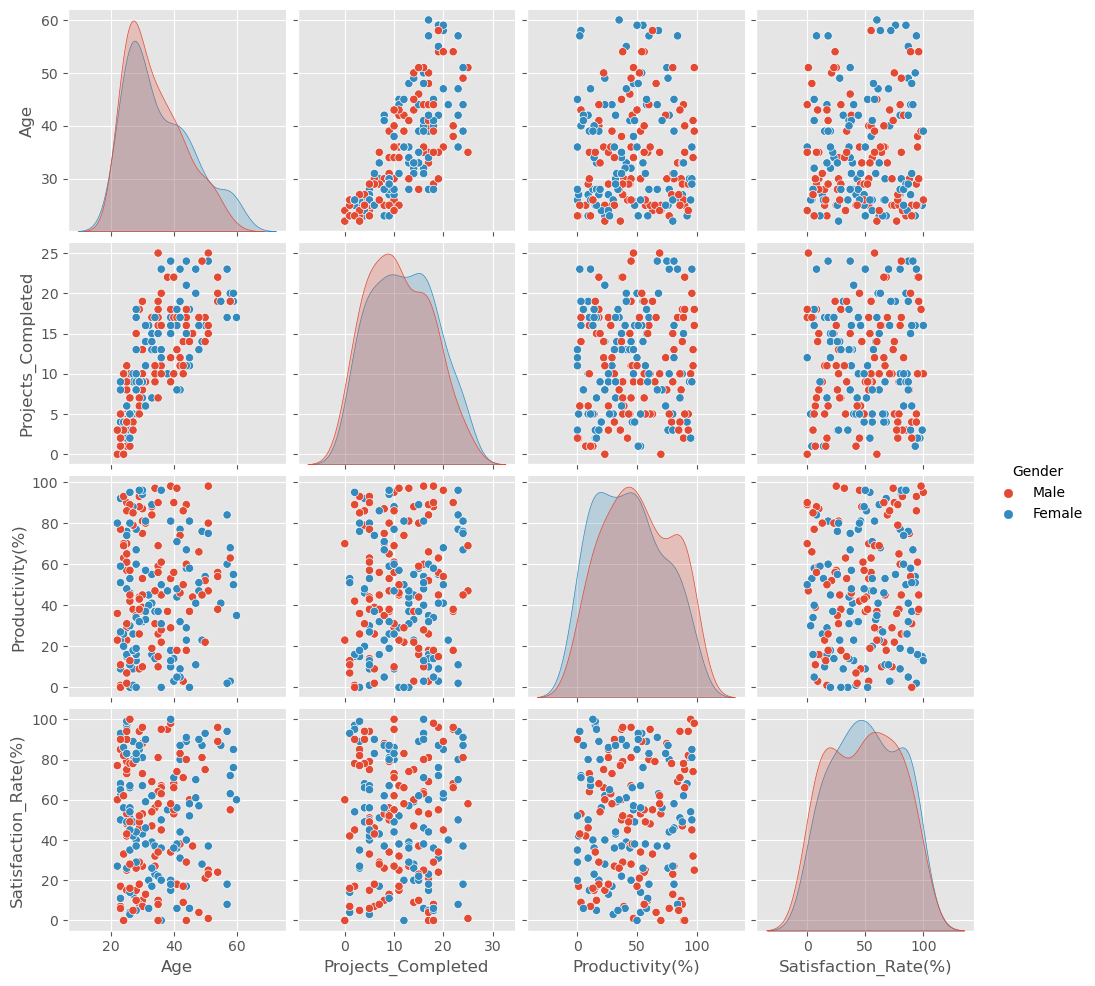

In [78]:
sns.pairplot(hr_df, vars =  ['Age', 'Projects_Completed', 'Productivity(%)', 'Satisfaction_Rate(%)'], hue = 'Gender')

In [82]:
hr_corr = hr_df[['Age', 'Projects_Completed', 'Productivity(%)', 'Satisfaction_Rate(%)', 'Feedback_Score']].corr()
hr_corr

,Age,Projects_Completed,Productivity(%),Satisfaction_Rate(%),Feedback_Score
Age,1.000000,0.758364,0.021193,0.035284,0.012014
Projects_Completed,0.758364,1.000000,0.061707,-0.010815,0.083170
Productivity(%),0.021193,0.061707,1.000000,0.049897,-0.005948
Satisfaction_Rate(%),0.035284,-0.010815,0.049897,1.000000,0.008068
Feedback_Score,0.012014,0.083170,-0.005948,0.008068,1.000000


<Axes: >

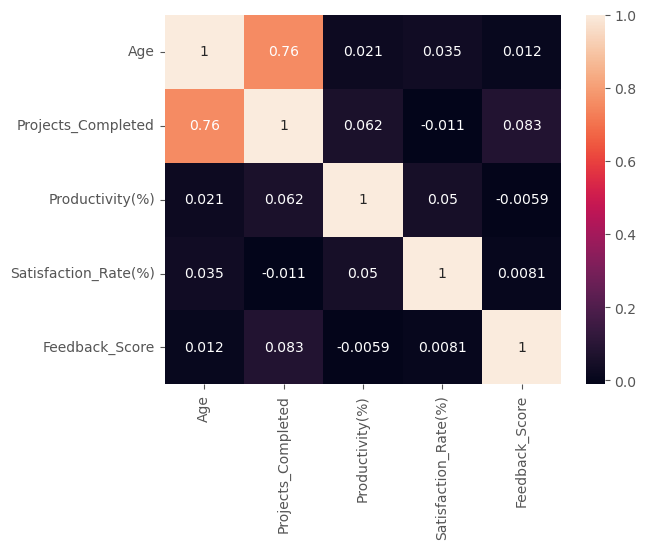

In [83]:
sns.heatmap(hr_corr, annot = True)

There's a high correlation between ages and their projects completed.

# Ask Questions about the data

* What Department has a highest satisfaction rating?
* What Position has a highest Productivity?
* What Position has a highest Salary? 

Text(0.5, 0, 'Satisfaction Rate (%)')

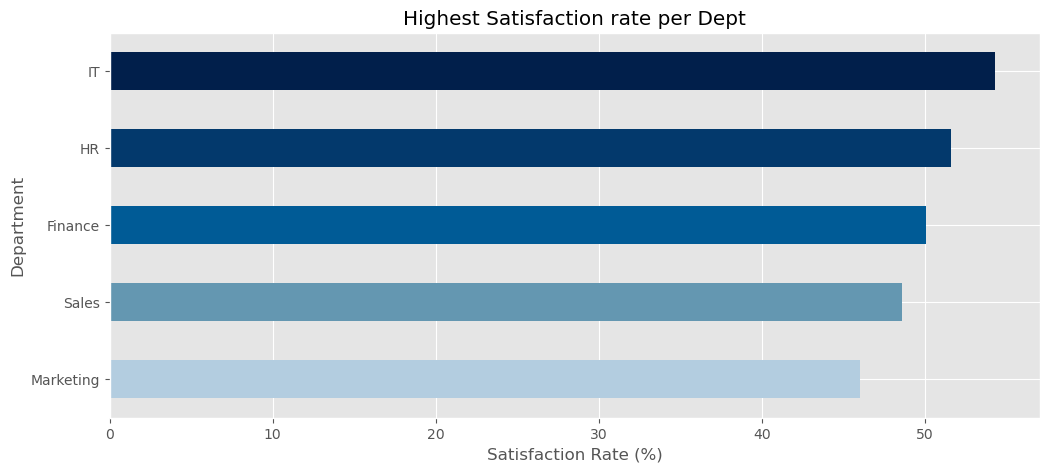

In [94]:
axis = hr_df.query('Department != "Other"').groupby('Department')['Satisfaction_Rate(%)'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Highest Satisfaction rate per Dept',
                                        color = ['#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('Satisfaction Rate (%)')

Text(0.5, 0, 'Productivity (%)')

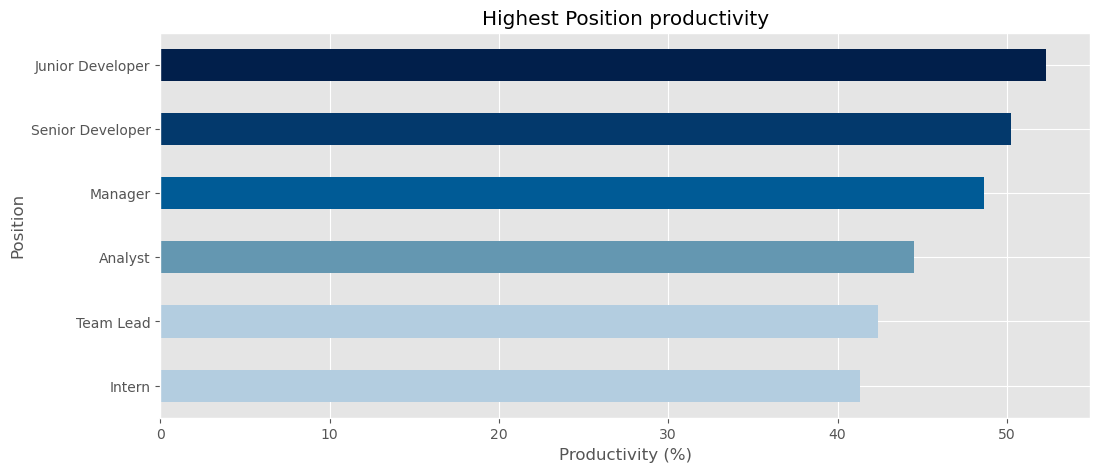

In [97]:
axis = hr_df.query('Position != "Other"').groupby('Position')['Productivity(%)'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Highest Position productivity',
                                        color = ['#b3cde0', '#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('Productivity (%)')

Text(0.5, 0, 'Salary')

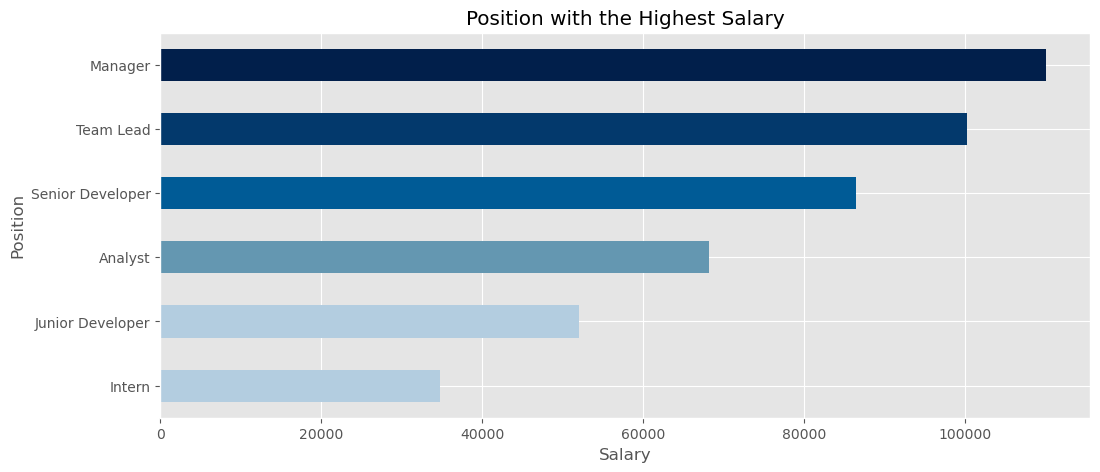

In [101]:
axis = hr_df.query('Position != "Other"').groupby('Position')['Salary'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Position with the Highest Salary',
                                        color = ['#b3cde0', '#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('Salary')